In [1]:
import warnings
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

In [2]:
df = pd.read_csv("data/Indicadores_CEINS.csv")
ocupacion = df.loc[df['fecha'] >= '2013-01-01']
ocupacion['fecha'].min(), ocupacion['fecha'].max()
ocupacion.head()

,Hotel,fecha,occ,habs_disp,tp,po,pt,te
0,CEINS,2013-01-01,0.194969,159,1100.34,0.930938,1.15998,214.531
1,CEINS,2013-01-02,0.245283,159,1045.75,0.921469,1.12549,256.506
2,CEINS,2013-01-03,0.283019,159,1022.09,0.980766,1.03368,289.270
3,CEINS,2013-01-04,0.251572,159,1017.40,0.947943,1.10197,255.950
4,CEINS,2013-01-05,0.270440,159,1027.94,1.158630,1.10918,277.996


In [3]:
cols = ['Hotel','habs_disp','tp','po','pt','te']
ocupacion = ocupacion.drop(cols, axis=1)
ocupacion = ocupacion.sort_values('fecha')
ocupacion.isnull().sum()
ocupacion.head()

,fecha,occ
0,2013-01-01,0.194969
1,2013-01-02,0.245283
2,2013-01-03,0.283019
3,2013-01-04,0.251572
4,2013-01-05,0.270440


In [4]:
ocupacion = ocupacion.groupby('fecha')['occ'].sum().reset_index()

In [5]:
ocupacion['fecha']=pd.to_datetime(ocupacion['fecha'])
ocupacion = ocupacion.set_index('fecha')
ocupacion.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2018-08-04', '2018-08-05', '2018-08-06', '2018-08-07',
               '2018-08-08', '2018-08-09', '2018-08-10', '2018-08-11',
               '2018-08-12', '2018-08-13'],
              dtype='datetime64[ns]', name='fecha', length=2051, freq=None)

In [6]:
y = ocupacion

In [7]:
y['2017':]

,occ
fecha,
2017-01-01,0.220126
2017-01-02,0.207547
2017-01-03,0.264151
2017-01-04,0.377358
2017-01-05,0.314465
2017-01-06,0.201258
2017-01-07,0.251572
2017-01-08,0.339623
2017-01-09,0.622642


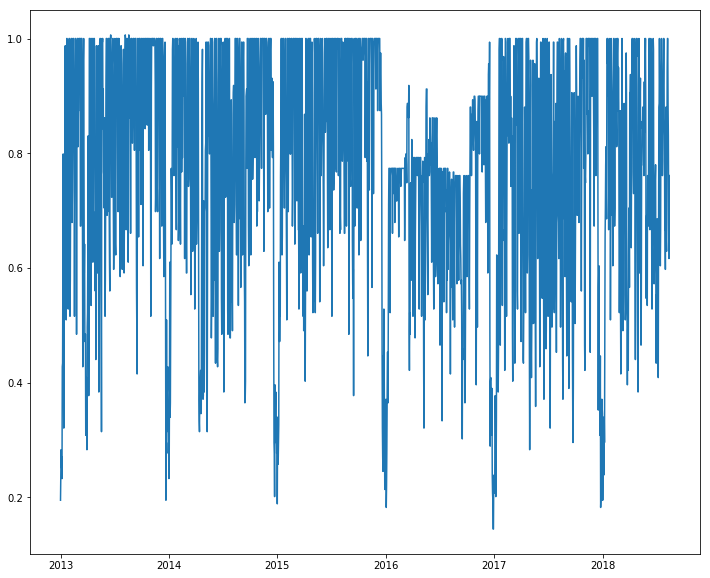

In [8]:
plt.plot(y['occ'])
plt.savefig('figures/TsOcc.png', dpi=100)
plt.show()

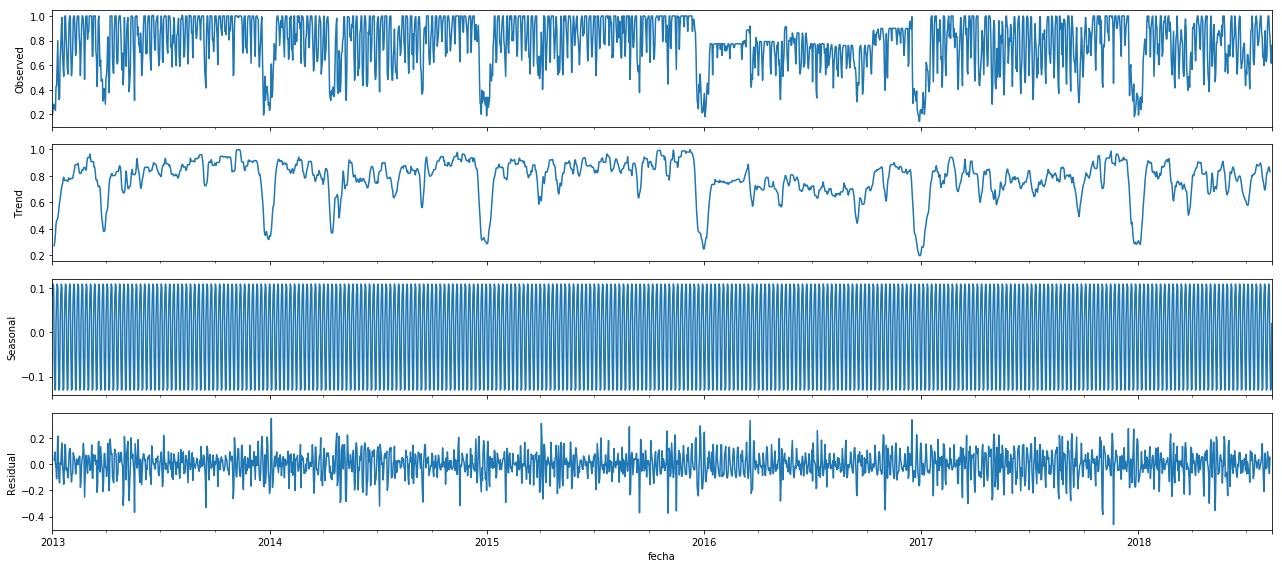

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.savefig('figures/Decomp.png', dpi=100)
plt.show()

In [10]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 1, 0, 7)
SARIMAX: (0, 1, 0) x (0, 1, 1, 7)
SARIMAX: (0, 1, 0) x (1, 0, 0, 7)


In [11]:
lowest_aic = None
lowest_parm = None
lowest_param_seasonal = None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            current_aic = results.aic
            if (lowest_aic == None):
                lowest_aic = results.aic
            if (current_aic <= lowest_aic):
                lowest_aic = current_aic
                lowest_parm = param
                lowest_param_seasonal = param_seasonal
            print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            #print('ARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
print('The best model is: SARIMA{}x{} - AIC:{}'.format(lowest_parm, lowest_param_seasonal, lowest_aic))

/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC:4932.750118479033
SARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC:2873.9786689173466
SARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC:-949.9305121630528
SARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC:-1270.8930561866455
SARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC:-973.6750069396863
SARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC:-1266.4109625142921


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC:-1142.91495489352


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC:-1600.7339652129558
SARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC:2524.395656547878


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC:1155.8704556670555
SARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC:-1769.1043375476954


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC:-2416.356275413268
SARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC:-1808.4819263947882


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC:-2413.671847826431
SARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC:-2087.1363159787743


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC:-2573.2280542333656
SARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC:-1923.6718367359372
SARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC:-2126.6605328191217
SARIMA(0, 1, 0)x(0, 1, 0, 7) - AIC:-1521.73076098556


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(0, 1, 1, 7) - AIC:-2788.9569123593988
SARIMA(0, 1, 0)x(1, 0, 0, 7) - AIC:-2257.278724204716


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(1, 0, 1, 7) - AIC:-2803.3559629292185
SARIMA(0, 1, 0)x(1, 1, 0, 7) - AIC:-2123.1385330764247


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(1, 1, 1, 7) - AIC:-2780.12808959797
SARIMA(0, 1, 1)x(0, 0, 0, 7) - AIC:-1951.21745278958


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(0, 0, 1, 7) - AIC:-2128.7943222153153
SARIMA(0, 1, 1)x(0, 1, 0, 7) - AIC:-1566.1163406078424


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(0, 1, 1, 7) - AIC:-2820.467251100027
SARIMA(0, 1, 1)x(1, 0, 0, 7) - AIC:-2256.09106145712


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(1, 0, 1, 7) - AIC:-2835.846033781117


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(1, 1, 0, 7) - AIC:-2171.535707004551
SARIMA(0, 1, 1)x(1, 1, 1, 7) - AIC:-2815.212331015441
SARIMA(1, 0, 0)x(0, 0, 0, 7) - AIC:-1941.2322487996012
SARIMA(1, 0, 0)x(0, 0, 1, 7) - AIC:-2150.469872781915


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 0)x(0, 1, 0, 7) - AIC:-1948.6923528036496


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 0)x(0, 1, 1, 7) - AIC:-3046.330908085627
SARIMA(1, 0, 0)x(1, 0, 0, 7) - AIC:-2296.2743706788906


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 0)x(1, 0, 1, 7) - AIC:-3051.7840711233257
SARIMA(1, 0, 0)x(1, 1, 0, 7) - AIC:-2450.671584589624


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 0)x(1, 1, 1, 7) - AIC:-3042.968692924939
SARIMA(1, 0, 1)x(0, 0, 0, 7) - AIC:-1974.1819252669984


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(0, 0, 1, 7) - AIC:-2156.2870941733827
SARIMA(1, 0, 1)x(0, 1, 0, 7) - AIC:-1976.2444386952156


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(0, 1, 1, 7) - AIC:-3044.079340656685


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(1, 0, 0, 7) - AIC:-2294.277542267359


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(1, 0, 1, 7) - AIC:-3050.8003461061617


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(1, 1, 0, 7) - AIC:-2455.260908185938


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(1, 1, 1, 7) - AIC:-3043.549517724812
SARIMA(1, 1, 0)x(0, 0, 0, 7) - AIC:-1942.328423460323
SARIMA(1, 1, 0)x(0, 0, 1, 7) - AIC:-2127.869420951022


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(0, 1, 0, 7) - AIC:-1540.7666612513847


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(0, 1, 1, 7) - AIC:-2803.83202129056
SARIMA(1, 1, 0)x(1, 0, 0, 7) - AIC:-2255.0425267321316


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(1, 0, 1, 7) - AIC:-2818.038509024621


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(1, 1, 0, 7) - AIC:-2143.519524297163


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(1, 1, 1, 7) - AIC:-2796.9258170711787
SARIMA(1, 1, 1)x(0, 0, 0, 7) - AIC:-2214.7926855013193


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(0, 0, 1, 7) - AIC:-2458.943210490028


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(0, 1, 0, 7) - AIC:-1935.9408994313098


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(0, 1, 1, 7) - AIC:-3028.191700640786


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(1, 0, 0, 7) - AIC:-2613.030420346594


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(1, 0, 1, 7) - AIC:-3043.073694521173


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(1, 1, 0, 7) - AIC:-2438.8589776592767


/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(1, 1, 1, 7) - AIC:-3024.471484353602
The best model is: SARIMA(1, 0, 0)x(1, 0, 1, 7) - AIC:-3051.7840711233257


In [12]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=lowest_parm,
                                seasonal_order=lowest_param_seasonal,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                
Dep. Variable:                               occ   No. Observations:                 2051
Model:             SARIMAX(1, 0, 0)x(1, 0, 1, 7)   Log Likelihood                1529.892
Date:                           Mon, 18 Mar 2019   AIC                          -3051.784
Time:                                   20:49:08   BIC                          -3029.295
Sample:                               01-01-2013   HQIC                         -3043.536
                                    - 08-13-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7679      0.013     60.921      0.000       0.743       0.793
ar.S.L7        0.9985      0.001    851.224

/Users/ocamarena/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


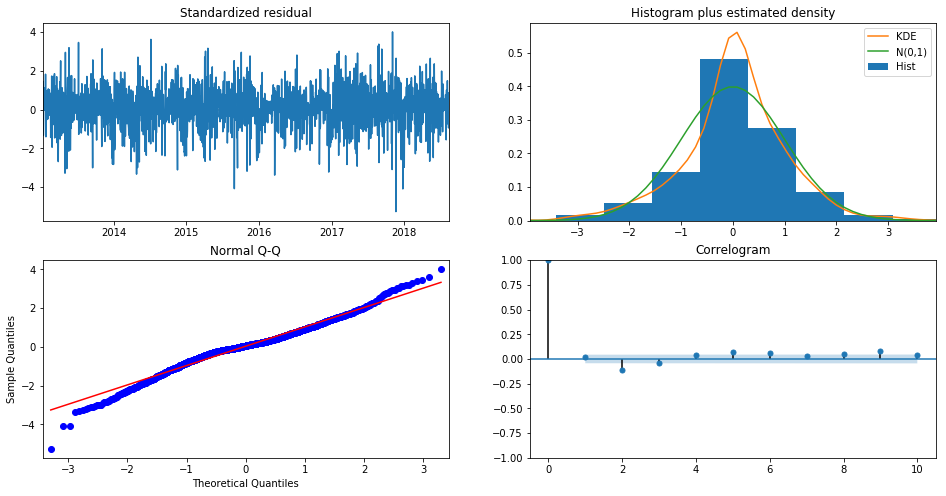

In [13]:
results.plot_diagnostics(figsize=(16, 8))
plt.savefig('figures/sarimax_summary.png')
plt.show()

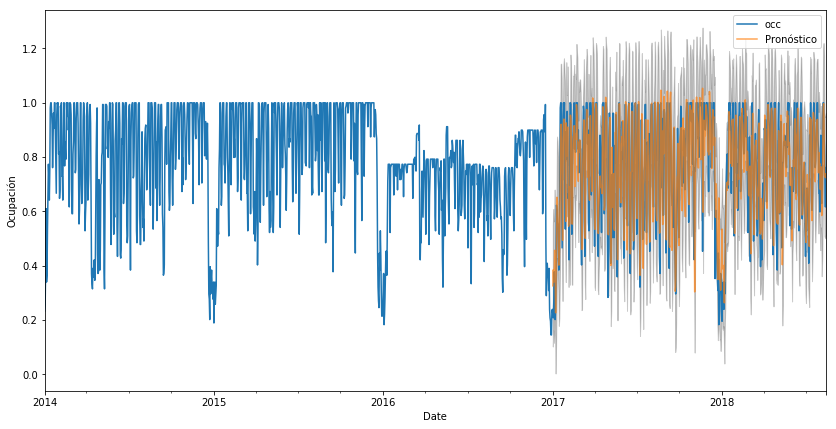

In [17]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Pronóstico', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Ocupación')
plt.legend()
plt.savefig('Figures/ARIMA_pred.png')
plt.show()

In [18]:
real=y['2017':]
MAPE = (sum(abs((real['occ']-pred.predicted_mean))/real['occ'])/len(real['occ']))*100
print(MAPE)

14.8880919266


In [19]:
y_forecasted = pd.DataFrame(pred.predicted_mean,columns=['occ'])
y_truth = y['2017-01-01':]
mse = ((y_forecasted[['occ']]-y_truth[['occ']])**2).mean()
#mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is occ    0.02
dtype: float64


In [20]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is occ    0.12
dtype: float64


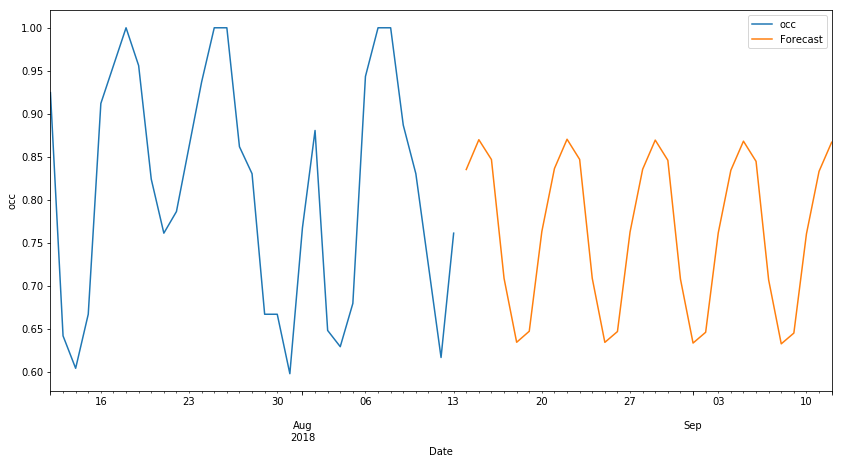

In [21]:
y2=y[2018:]
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()
ax = y2.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('occ')
plt.legend()
plt.savefig('Figures/ArimaPred.png',dpi=100)
plt.show()

In [57]:
arima_pred = pred_uc.predicted_mean
arima_pred.to_csv('data/arima_pred.csv', sep=',')

In [59]:
arima_pred

2018-08-14    0.835078
2018-08-15    0.869752
2018-08-16    0.846674
2018-08-17    0.708476
2018-08-18    0.634059
2018-08-19    0.646862
2018-08-20    0.762983
2018-08-21    0.836225
2018-08-22    0.870294
2018-08-23    0.846825
2018-08-24    0.708506
2018-08-25    0.633949
2018-08-26    0.646540
2018-08-27    0.762341
2018-08-28    0.835361
2018-08-29    0.869293
2018-08-30    0.845792
2018-08-31    0.707627
2018-09-01    0.633140
2018-09-02    0.645683
2018-09-03    0.761289
2018-09-04    0.834183
2018-09-05    0.868050
2018-09-06    0.844574
2018-09-07    0.706605
2018-09-08    0.632223
2018-09-09    0.644742
2018-09-10    0.760173
2018-09-11    0.832957
2018-09-12    0.866772
Freq: D, dtype: float64